In [1]:
from pyMeasure import *
import pdfkit

Importing Code.Utils.Names
Importing Code.DataHandlers.NISTModels
Importing Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
Importing Code.DataHandlers.RadiCALModels
Importing Code.DataHandlers.ZipModels
Importing Code.DataHandlers.Translations
Importing Code.DataHandlers.StatistiCALModels
Importing Code.DataHandlers.MUFModels
Importing Code.Analysis.SParameter
Importing Code.InstrumentControl.Instruments
Importing Code.InstrumentControl.Experiments


In [2]:
pdfkit.from_file(os.path.join(TESTS_DIRECTORY,"One_Port_Sparameter_20160307_001.html"),"test.pdf")

IOError: No wkhtmltopdf executable found: ""
If this file exists please check that this process can read it. Otherwise please install wkhtmltopdf - https://github.com/JazzCore/python-pdfkit/wiki/Installing-wkhtmltopdf

In [8]:
import os
s2p=SNP(os.path.join(TESTS_DIRECTORY,"Filter_n7_f0_2_35ghz.s2p"),extension="s2p",
        metadata={"Connector_Type_Measurement":"N"},column_types=['float' for i in range(9)])

In [9]:
s2p.change_data_format("MA")
s2p.change_frequency_units("GHz")
s2p.options["column_names"]=s2p.column_names
calrep_file=calrep(s2p)

In [9]:
s2p.column_names.index("Frequency")

0

In [3]:
from pyMeasure.Code.Analysis.SParameter import *

In [10]:
mean=frequency_model_collapse_multiple_measurements(s2p)

In [10]:
s2p.column_names


['Frequency',
 'magS11',
 'argS11',
 'magS21',
 'argS21',
 'magS12',
 'argS12',
 'magS22',
 'argS22']

In [11]:
s2p.elements


['data', 'noiseparameter_data', 'comments', 'option_line']

In [6]:
mean.update_model()
print s2p.data[0]
print mean.data[0]

[1.0, 0.999831513, 118.32982500000001, 0.00345233876, -151.816779, 0.00345233876, -151.816779, 0.9999637389999999, 117.695965]
['1.0', '0.999831513', '118.329825', '0.00345233876', '-151.816779', '0.00345233876', '-151.816779', '0.999963739', '117.695965']


In [7]:
mean.get_options()

inline_comments = None
data_begin_line = 1
column_names_begin_line = 0
columnn_types = ['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']
footer_line_types = None
general_descriptor = Sparameter
header_end_token = None
header_end_line = None
column_names_end_line = 1
data_table_element_separator = 

escape_character = None
data = None
inline_comment_begin = !
column_descriptions = None
inline_comment_end = 
comments = [[' Created Mon Nov 30 18:22:43 2015', 0, 0], [' 2 Port Network Data from SP1.SP block', 2, 0], [' freq  magS11  angS11  magS21  angS21  magS12  angS12  magS22  angS22  ', 3, 0], ['     ', 4, 0]]
data_begin_token = None
comment_end = None
header_begin_line = None
row_end_token = None
sparameter_complex = []
number_ports = None
column_names_end_token = None
block_comment_begin = None
method = mean
header_begin_token = None
metadata = None
specific_descriptor = mean_Multiport
option_line_line = 1
empty_value = None
column_names_begin_token = N

In [13]:
calrep_file.metadata["Device_Id"]=" Fake Device"
plot_calrep(calrep_file)

average_columns is ['magS11', 'argS11', 'magS21', 'argS21', 'magS12', 'argS12', 'magS22', 'argS22']
Length of x is 11001, Length of y is 11001, Length of error is 11001
Length of x is 11001, Length of y is 11001, Length of error is 11001
Length of x is 11001, Length of y is 11001, Length of error is 11001
Length of x is 11001, Length of y is 11001, Length of error is 11001


In [1]:
from win32com import client

In [2]:
word=client.DispatchEx("Word.Application")

In [6]:
doc=word.Documents.Open(r"C:\Share\Aric-2016-05-11\Aric\Fab Resume Aric Sanders 2016.docx")

com_error: (-2147023170, 'The remote procedure call failed.', None, None)

In [17]:
doc.SaveAs("test.pdf",FileFormat=17)

In [18]:
doc.SaveAs("test.html",FileFormat=10)

In [19]:
doc.SaveAs("test2.html",FileFormat=8)

In [22]:
doc.SaveAs("test.odt",FileFormat=23)

In [ ]:
doc.Close()

In [2]:
def doc_file_to_pdf_file(doc_file_name,pdf_file_name="test.pdf"):
    """Converts a microsoft doc or docx file to a pdf using word. 
    Requires word and win32com to be installed. Returns the new file name"""
    word=client.DispatchEx("Word.Application")
    doc=word.Documents.Open(doc_file_name)
    doc.SaveAs(pdf_file_name,FileFormat=17)
    doc.Close()
    word.Quit()
    return pdf_file_name

def doc_file_to_html_file(doc_file_name,html_file_name="test.html"):
    """Converts a microsoft doc or docx file to a filtered html file using word. 
    Requires word and win32com to be installed. Returns the new file name"""
    word=client.DispatchEx("Word.Application")
    doc=word.Documents.Open(doc_file_name)
    doc.SaveAs(html_file_name,FileFormat=10)
    doc.Close()
    word.Quit()
    return html_file_name

def doc_file_to_odt_file(doc_file_name,odt_file_name="test.odt"):
    """Converts a microsoft doc or docx file to a open document format file using word. 
    Requires word and win32com to be installed. Returns the new file name"""
    word=client.DispatchEx("Word.Application")
    doc=word.Documents.Open(doc_file_name)
    doc.SaveAs(odt_file_name,FileFormat=23)
    doc.Close()
    word.Quit()
    return odt_file_name

def odt_file_to_doc_file(odt_file_name,doc_file_name="test.docx"):
    """Converts a microsoft doc or docx file to a open document format file using word. 
    Requires word and win32com to be installed. Returns the new file name"""
    word=client.DispatchEx("Word.Application")
    doc=word.Documents.Open(odt_file_name)
    doc.SaveAs(doc_file_name,FileFormat=0)
    doc.Close()
    word.Quit()
    return doc_file_name

In [8]:
doc_file_to_pdf_file(r"C:\Share\Aric-2016-05-11\Aric\CV 3i.odt")

'test.pdf'

In [4]:
def excel_file_to_ods_file(excel_file_name,ods_file_name="test.ods"):
    """Converts a microsoft xlsx or xls file to a open document spreadsheet file using excel. 
    Requires word and win32com to be installed. Returns the new file name"""
    excel=client.DispatchEx("Excel.Application")
    workbook=excel.Workbooks.Open(excel_file_name)
    workbook.SaveAs(ods_file_name,FileFormat=60)
    workbook.Close()
    excel.Quit()
    return ods_file_name

def ods_file_to_excel_file(ods_file_name,excel_file_name="test.xlsx"):
    """Converts a microsoft doc or docx file to a open document format file using word. 
    Requires word and win32com to be installed. Returns the new file name"""
    excel=client.DispatchEx("Excel.Application")
    workbook=excel.Workbooks.Open(ods_file_name)
    workbook.SaveAs(excel_file_name,FileFormat=51)
    workbook.Close()
    excel.Quit()
    return excel_file_name

In [18]:
def PptxFile_to_OdpFile(power_point_file_name,odp_file_name="test.odp"):
    power_point=client.DispatchEx("PowerPoint.Application")
    presentation=power_point.Presentations.Open(power_point_file_name)
    presentation.SaveAs(odp_file_name,FileFormat=35)
    presentation.Close()
    power_point.Quit()
    return odp_file_name

def OdpFile_to_PptxFile(odp_file_name,power_point_file_name="test.pptx"):
    power_point=client.DispatchEx("PowerPoint.Application")
    presentation=power_point.Presentations.Open(odp_file_name)
    presentation.SaveAs(power_point_file_name,FileFormat=11)
    presentation.Close()
    power_point.Quit()
    return power_point_file_name

In [5]:
excel_file_to_ods_file(r'E:\Share\Administrative\Tasks 01012012.xlsx')

'test.ods'

In [6]:
ods_file_to_excel_file("test.ods")

'test.xlsx'

In [22]:
PptxFile_to_OdpFile(r"test.pptx")

'test.odp'

In [25]:
OdpFile_to_PptxFile("test.odp")

'test.pptx'

In [9]:
power_point=client.DispatchEx("PowerPoint.Application")
#presentation=power_point.Presentations.Open(odp_file_name)
#presentation.SaveAs(power_point_file_name,FileFormat=11)
#presentation.Close()
#power_point.Quit()

In [11]:
pres=power_point.Presentations.Open("E:\Share\S Parameter - Impedance 20161108.pptx")

In [12]:
pres.SaveAs("test.odp",FileFormat=35)

In [13]:
pres.Close()

In [15]:
power_point.Quit()

com_error: (-2147417848, 'The object invoked has disconnected from its clients.', None, None)

In [26]:
from pyMeasure import *

Importing Code.Utils.Names
Importing Code.DataHandlers.NISTModels
Importing Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
Importing Code.DataHandlers.RadiCALModels
Importing Code.DataHandlers.ZipModels
Importing Code.DataHandlers.Translations
Importing Code.DataHandlers.StatistiCALModels
Importing Code.DataHandlers.MUFModels
Importing Code.Analysis.SParameter
Importing Code.InstrumentControl.Instruments
Importing Code.InstrumentControl.Experiments


In [1]:
from pyMeasure.Code.DataHandlers.GraphModels import *

Importing Code.Utils.Names
Importing Code.DataHandlers.NISTModels
Importing Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
Importing Code.DataHandlers.RadiCALModels
Importing Code.DataHandlers.ZipModels
Importing Code.DataHandlers.Translations
Importing Code.DataHandlers.StatistiCALModels
Importing Code.DataHandlers.MUFModels
Importing Code.Analysis.SParameter
Importing Code.InstrumentControl.Instruments
Importing Code.InstrumentControl.Experiments


In [2]:
image_graph=ImageGraph()

In [3]:
image_graph.show()

In [6]:
image_graph.jump_to_external_node("thumbnail",**{"file_path":"thumbnail_test.jpg"})

['edge_Image_png_000', 'edge_png_Image_000']
moving Image -> png
pil_image.mode is RGBA
moving png -> Image


'thumbnail_test.jpg'

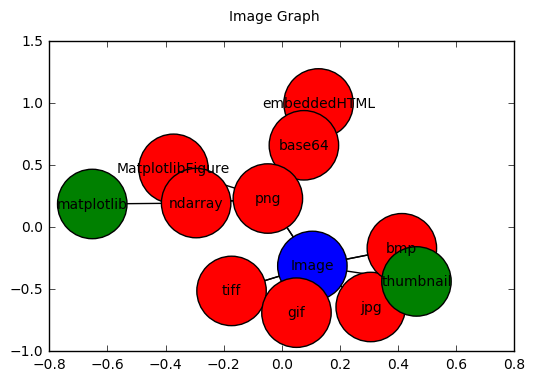

In [34]:
image_graph.show(descriptions=False,node_size=2500)

In [35]:
import networkx

In [50]:
networkx.draw_networkx(image_graph.display_graph,pos=image_graph.display_layout,
                       labels={node:str(index+1) for index,node in enumerate(image_graph.node_names)})

<IPython.core.display.Javascript object>


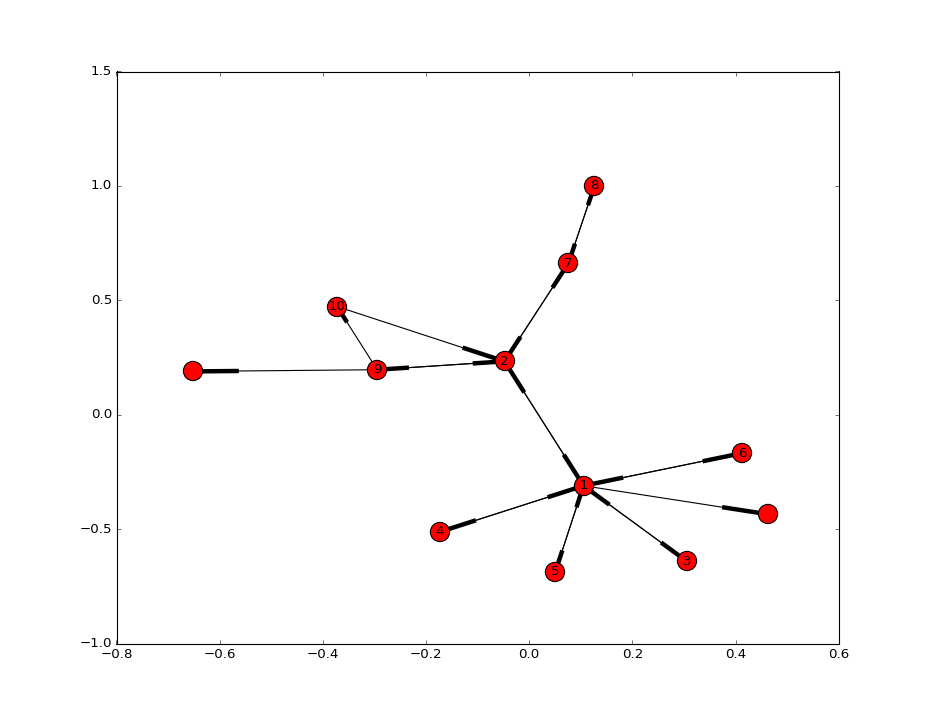

In [53]:
%matplotlib notebook
networkx.draw_networkx(image_graph.display_graph,pos=image_graph.display_layout,
                       labels={node:str(index+1) for index,node in enumerate(image_graph.node_names)})
plt.show()

In [43]:
image_graph.node_names

['Image',
 'png',
 'jpg',
 'tiff',
 'gif',
 'bmp',
 'base64',
 'embeddedHTML',
 'ndarray',
 'MatplotlibFigure']

In [3]:
table_graph=TableGraph()

In [3]:

table_graph.show()

In [4]:
meta_graph=MetadataGraph()

In [7]:
plt.close()
meta_graph.show()

In [61]:
import StringIO
import cStringIO

In [62]:
test_string="A new String\nAnother Line"

In [70]:
def String_to_StringIo(string):
    """Converts a string to a StringIO.StringIO object"""
    return StringIO.StringIO(string)
def StringIo_to_String(string_io_object):
    """Converts a StringIO.StringIO object to a string """
    return string_io_object.getvalue()
def String_to_CStringIo(string):
    """Converts a string to a StringIO.StringIO object"""
    return cStringIO.StringIO(string)
def CStringIo_to_String(string_io_object):
    """Converts a StringIO.StringIO object to a string """
    return string_io_object.getvalue()

In [67]:
stio1=String_to_StringIo(test_string)

In [68]:
st2=StringIo_to_String(stio1)

In [69]:
test_string==st2

True

In [71]:
cstio1=String_to_CStringIo(test_string)

In [72]:
st3=CStringIo_to_String(cstio1)

In [73]:
test_string==st3

True

In [7]:
string_graph=StringGraph()

<IPython.core.display.Javascript object>


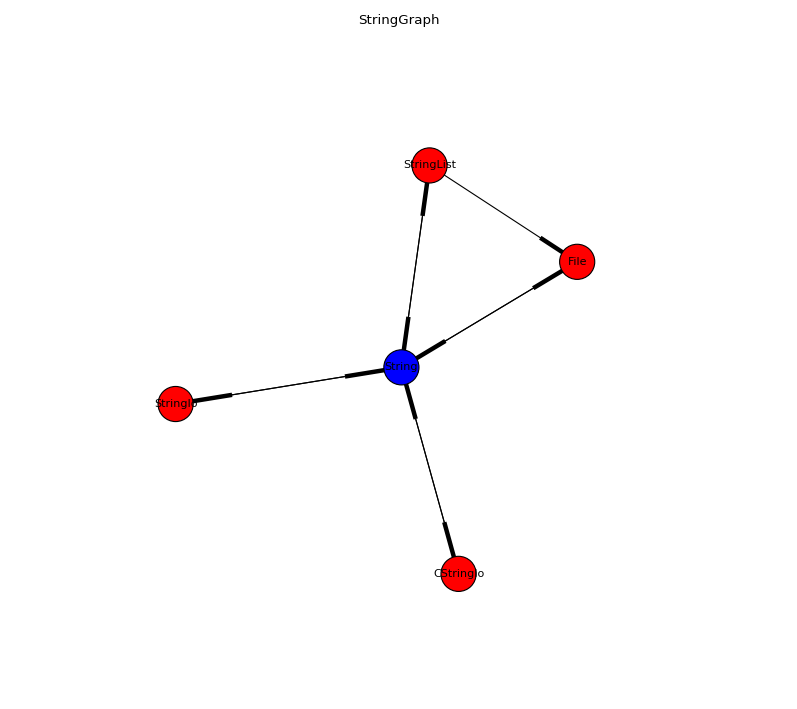

(-1.5, 1.5, -1.5, 1.5)

In [11]:
plt.close()
string_graph.show()
plt.axis('off')

In [1]:
from pyMeasure import *
from pyMeasure.Code.DataHandlers.GraphModels import *

Importing Code.Utils.Names
Importing Code.DataHandlers.NISTModels
Importing Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
Importing Code.DataHandlers.RadiCALModels
Importing Code.DataHandlers.ZipModels
Importing Code.DataHandlers.Translations
Importing Code.DataHandlers.StatistiCALModels
Importing Code.DataHandlers.MUFModels
Importing Code.Analysis.SParameter
Importing Code.InstrumentControl.Instruments
Importing Code.InstrumentControl.Experiments


In [2]:
from ipywidgets import *
def move_and_show(end_node_number,graph):
    node=graph.node_names[end_node_number]
    graph.move_to_node(node)
    print("*"*80)
    print("{0}".format(graph.node_descriptions[end_node_number])+" {0}".format(graph.state))
    print("*"*80)
    graph.show(descriptions=False)
def interactive_move_and_show(graph):
    interact(lambda end_node_number:move_and_show(end_node_number,graph),end_node_number=(0,len(graph.node_names)-1,1))

['edge_AsciiDataTable_DataFrame_000', 'edge_DataFrame_HtmlString_000']
moving AsciiDataTable -> DataFrame
moving DataFrame -> HtmlString
********************************************************************************
HTML String [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
********************************************************************************


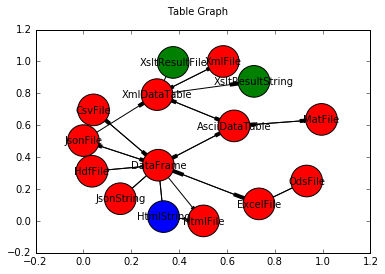

In [3]:
%matplotlib inline
raw=TwoPortRawModel(os.path.join(TESTS_DIRECTORY,'CTN208.A1_011613'))
table_graph=TableGraph()
table_graph.set_state("AsciiDataTable",raw)
interactive_move_and_show(table_graph)

<IPython.core.display.Javascript object>


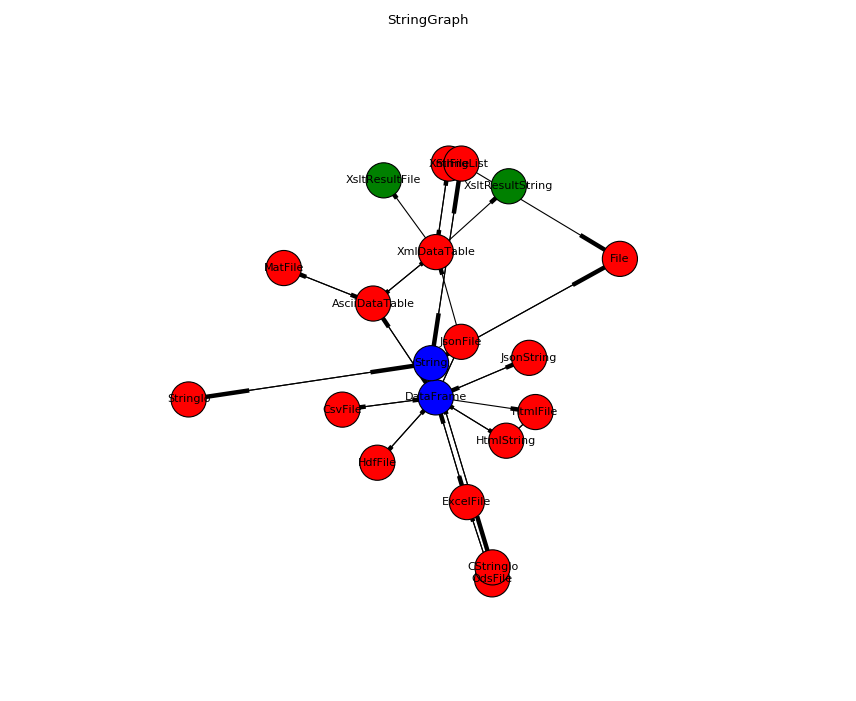

(-1.0, 0.60000000000000009, -1.5, 1.5)

In [6]:
%matplotlib notebook
table_graph=TableGraph()
table_graph.show(active_node=True)
plt.axis('off')

['edge_File_String_000', 'edge_String_StringList_000']
moving File -> String
moving String -> StringList
********************************************************************************
A list of strings with no \n, created with string.splitlines() [0, 1, 0, 0, 0]
********************************************************************************


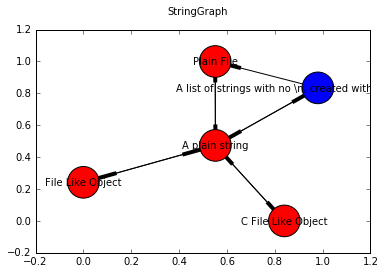

In [4]:
%matplotlib inline
string_graph=StringGraph()
interactive_move_and_show(string_graph)

In [14]:
import os
os.path.join(*["c://file","name.txt"])

'c://file\\name.txt'

In [12]:
import html5lib 

In [9]:
table_graph.node_names

['DataFrame',
 'AsciiDataTable',
 'HdfFile',
 'XmlDataTable',
 'ExcelFile',
 'OdsFile',
 'HtmlString',
 'JsonFile',
 'JsonString',
 'CsvFile',
 'MatFile',
 'XmlFile',
 'HtmlFile']

In [2]:
import pandas
df=pandas.DataFrame([[1,2],[3,4]],columns=["a","b"])

In [8]:
df

,a,b
0,1,2
1,3,4


In [3]:
html=DataFrame_to_HtmlString(df)

In [6]:
df2=pandas.read_html(str(html))
df2[0]

,a,b
0,1,2
1,3,4


In [6]:
import StringIO
import lxml
df2=pandas.read_html(html)

ImportError: lxml not found, please install it

In [4]:
import lxml

In [16]:
def HtmlFile_to_DataFrame(html_file_name):
    in_file=open(html_file_name,'r')
    pandas_data_frame=pandas.read_html(in_file)
    return pandas_data_frame
def HtmlString_to_DataFrame(html_string):
    list_df=pandas.read_html(html_string)
    return list_df[0]

In [28]:
mean.options["data_begin_token"]="<tbody>"
mean.options["data_end_token"]="</tbody></table>"
mean.options["data_delimiter"]="</td><td>"
mean.options["row_begin_token"]="<tr><td>"
mean.options["row_end_token"]="</td></tr>"
mean.options["column_names_begin_token"]="<table><thead><tr><th>"
mean.options["column_names_end_token"]="</th></tr></thead>"
mean.options["column_names_delimiter"]="</th><th>"


In [29]:
str(mean)[0:1000]

'<table><thead><tr><th>Frequency</th><th>magS11</th><th>argS11</th><th>magS21</th><th>argS21</th><th>magS12</th><th>argS12</th><th>magS22</th><th>argS22</th></tr></thead>\n<tbody><tr><td>1.0</td><td>0.999831513</td><td>118.329825</td><td>0.00345233876</td><td>-151.816779</td><td>0.00345233876</td><td>-151.816779</td><td>0.999963739</td><td>117.695965</td></tr><tr><td>1.001</td><td>0.999830782</td><td>118.257259</td><td>0.00346286655</td><td>-151.89004</td><td>0.00346286655</td><td>-151.89004</td><td>0.999963575</td><td>117.621649</td></tr><tr><td>1.002</td><td>0.999830049</td><td>118.184659</td><td>0.00347341541</td><td>-151.963335</td><td>0.00347341541</td><td>-151.963335</td><td>0.999963411</td><td>117.547298</td></tr><tr><td>1.003</td><td>0.999829313</td><td>118.112026</td><td>0.00348398533</td><td>-152.036664</td><td>0.00348398533</td><td>-152.036664</td><td>0.999963246</td><td>117.47291</td></tr><tr><td>1.004</td><td>0.999828574</td><td>118.03936</td><td>0.00349457634</td><td>-152

In [23]:
from IPython.display import display,HTML
#display(HTML(str(mean)))

In [24]:
len(mean.data)

11001

In [25]:
from pyMeasure.Code.DataHandlers.Translations import *

In [26]:
html=DataFrame_to_HtmlString(AsciiDataTable_to_DataFrame(mean))

In [30]:
print html[0:1000]

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Frequency</th>
      <th>magS11</th>
      <th>argS11</th>
      <th>magS21</th>
      <th>argS21</th>
      <th>magS12</th>
      <th>argS12</th>
      <th>magS22</th>
      <th>argS22</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1.000</td>
      <td>0.999832</td>
      <td>118.329825</td>
      <td>3.452339e-03</td>
      <td>-151.816779</td>
      <td>3.452339e-03</td>
      <td>-151.816779</td>
      <td>0.999964</td>
      <td>117.695965</td>
    </tr>
    <tr>
      <td>1.001</td>
      <td>0.999831</td>
      <td>118.257259</td>
      <td>3.462867e-03</td>
      <td>-151.890040</td>
      <td>3.462867e-03</td>
      <td>-151.890040</td>
      <td>0.999964</td>
      <td>117.621649</td>
    </tr>
    <tr>
      <td>1.002</td>
      <td>0.999830</td>
      <td>118.184659</td>
      <td>3.473415e-03</td>
      <td>-151.963335</td>
      <td>3.473415e-03</td>
      <td>-151.963335<